In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as lin
import funciones_spin as sp
%matplotlib notebook

In [2]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib import animation

In [14]:
# Creamos la lista inicial de Nodos

#lista1 = np.array([[1, -0.7]])
#lista2 = np.array([[0, -0.7]])
j = 0.7
lista1 = np.array( [[1, j], [2, j]])  
lista2 = np.array( [[2, j], [0, j]])
lista3 = np.array([[0, j], [1, j]])
H_ext = np.array([0, 0, 0])
s10 = sp.esf_to_cart(1, np.pi/2, 0)
s20 = sp.esf_to_cart(1, 0.05, 0)
s30 = sp.esf_to_cart(1, np.pi/4-0.5, 0)
nodo1 = sp.Nodo_spin(s10, H_ext, lista1)
nodo2 = sp.Nodo_spin(s20, H_ext, lista2)
nodo3 = sp.Nodo_spin(s30, H_ext, lista3)
lista_nodo0 = [nodo1, nodo2, nodo3]

# Simulamos la evolucion de los nodos
# en un arreglo t_array
t_array = np.linspace(0, 30, 200)
lista_nodos = sp.simular_spines(t_array, lista_nodo0)
spines = sp.extraer_spines(lista_nodos)

In [ ]:
print s10, s20

<IPython.core.display.Javascript object>


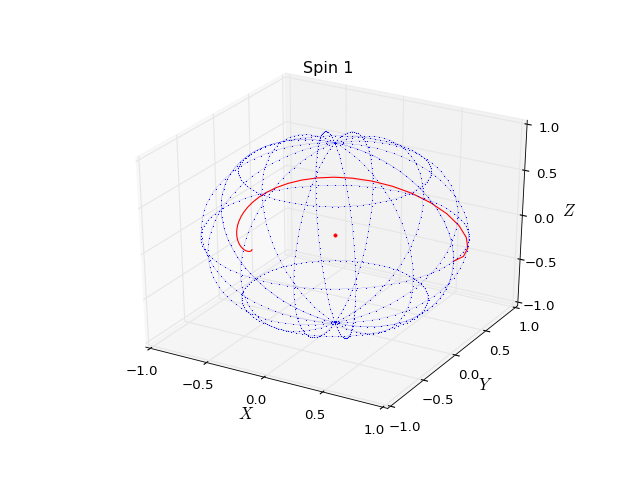

<IPython.core.display.Javascript object>


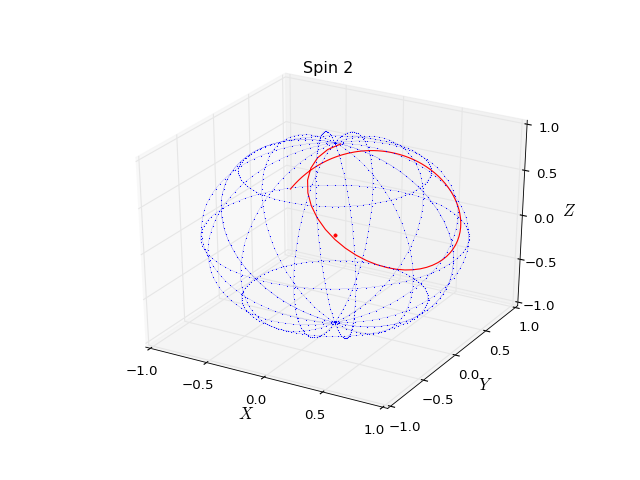

<IPython.core.display.Javascript object>


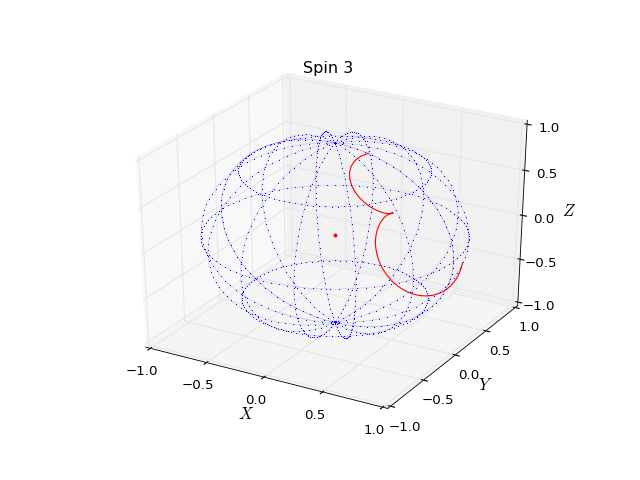

In [15]:
# Graficamos las trayectorias de cada spin por separado,
# durante todo el intervalo de tiempo

s1 = spines[0,:,:]
s2 = spines[1, :, :]
s3 = spines[2, :, :]
plt.clf()
sp.plot_spin(s1, t_array, 1)
plt.title('Spin 1')
sp.plot_spin(s2, t_array, 2)
plt.title('Spin 2' )
sp.plot_spin(s3, t_array, 3)
plt.title('Spin 3' )

In [17]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [21]:
def plotear_instante_grilla(spines, indice_t, posiciones, fig):
    '''
    Recibe una matriz con spines en formato
    [Nodo_i, intante_tiempo, componente_spin]
    y grafica la grilla en un instante indice_t, 
    (debe ser un entero) graficando los spines como
    flechas de norma 1, que parten en
    las posiciones de los nodos.
    
    Las posiciones se ingresan en un arreglo 2d de formato:
    [nodo_i, componente_pos] y las componentes son
    bidimensionales (nodos viven en un plano).
    
    Se debe ingresar tambien un objeto figure en el que se
    ploteará la grilla de nodos.
    '''
    grilla_en_t = spines[:, indice_t, :]
    n_nodos = np.size(grilla_en_t, 0)
    
    ax = fig.add_subplot(111, projection='3d')
    x_min, x_max = np.min(posiciones[:, 0]) -1.1, np.max(posiciones[:, 0]) +1.1
    y_min, y_max = np.min(posiciones[:, 1]) -1.1, np.max(posiciones[:, 1]) +1.1
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_zlim([-1.1, 1.1])
    n_lineas = 10
    sep_lineas = 2
    x = np.linspace(x_min, x_max, n_lineas)
    y = np.linspace(y_min, y_max, n_lineas)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n_lineas, n_lineas))
    ax.plot_wireframe(X, Y, Z, rstride=sep_lineas, cstride=sep_lineas)
    ax.azim = 80
    ax.elev = 60
    for i in range(n_nodos):
        x0 = posiciones[i, 0]
        y0 = posiciones[i, 1]
        z0 = 0
        xf = x0 + grilla_en_t[i, 0]
        yf = y0 + grilla_en_t[i, 1]
        zf = grilla_en_t[i, 2]
        arrow = Arrow3D([x0, xf], [y0, yf], [z0, zf], mutation_scale=20, lw=3, arrowstyle="->", color="g")
        ax.add_artist(arrow)
        ax.plot([x0], [y0], [z0], '.r', markersize=50)
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.set_zlabel('$Z$')
    plt.show()

    
i = 199
fig = plt.figure(4)
posiciones  = np.array([[0, 0, 0], [0, 1.2, 0], [0.5, 0.6, 0]])
plotear_instante_grilla(spines, i, posiciones, fig)

<IPython.core.display.Javascript object>


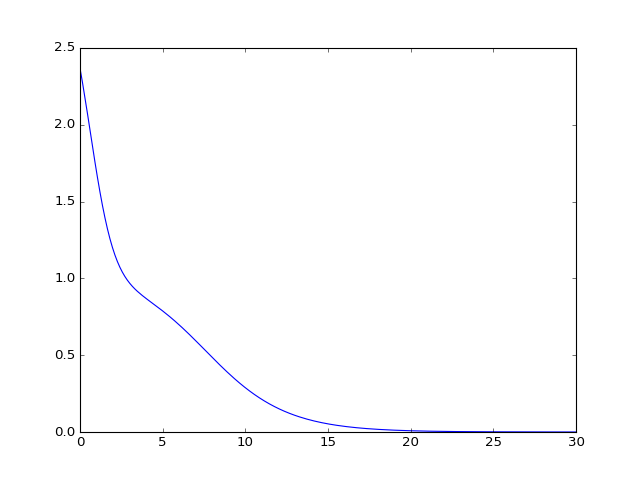

In [16]:
modulo = np.zeros_like(t_array)
for i in range(np.size(t_array)):
    modulo[i] = sp.norma(spines[0, i, :] + spines[1, i, :] + spines[2, i, :])
plt.figure(5)
plt.plot(t_array, modulo)

In [ ]:
spines[2, 20, :]

<IPython.core.display.Javascript object>


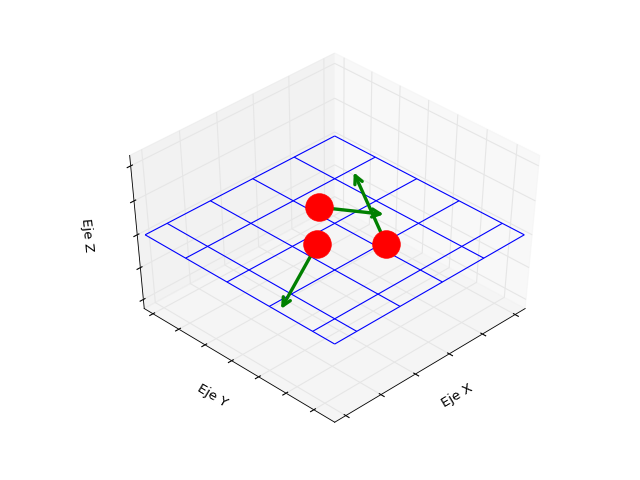

In [24]:
fig = plt.figure(4)

def anima(indice_t, spines, posiciones):
    #soluc = odeint(integra, ccii, t)
    
    grilla_en_t = spines[:, indice_t, :]
    n_nodos = np.size(grilla_en_t, 0)
    
    n_lineas = 10
    sep_lineas = 2
    x_min, x_max = np.min(posiciones[:, 0]) -1.1, np.max(posiciones[:, 0]) +1.1
    y_min, y_max = np.min(posiciones[:, 1]) -1.1, np.max(posiciones[:, 1]) +1.1
    x = np.linspace(x_min, x_max, n_lineas)
    y = np.linspace(y_min, y_max, n_lineas)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n_lineas, n_lineas))
    
    
    
    ax = fig.add_subplot(111, projection='3d')
    linea, = ax.plot([], [], [], label = 'Nodos', lw = 0.5)
    
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_zlim([-1.1, 1.1])
    #ax = Axes3D(fig)
    ax.azim = 45
    ax.elev = 45
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_zticklabels('')
    ax.plot_wireframe(X, Y, Z, rstride=sep_lineas, cstride=sep_lineas)
    for i in range(n_nodos):
        x0 = posiciones[i, 0]
        y0 = posiciones[i, 1]
        z0 = 0
        xf = x0 + grilla_en_t[i, 0]
        yf = y0 + grilla_en_t[i, 1]
        zf = grilla_en_t[i, 2]
        arrow = Arrow3D([x0, xf], [y0, yf], [z0, zf], mutation_scale=20, lw=3, arrowstyle="->", color="g")
        ax.add_artist(arrow)
        ax.plot([x0], [y0], [z0], '.r', markersize=50)
    return linea,


anim = animation.FuncAnimation(fig, anima, frames = 200, fargs = (spines, posiciones), interval = 5, blit = True)


In [25]:
anim.save('img_animaciones/Spines_3_antiferro.mp4', fps = 20)